# **Boston Ride Hailing Analysis and Pricing Dynamics**
### Group A01
### Project Members:
Ananya Anand <br>
Boyuan Chen <br>
Jenn Hong<br>
Khushi Jasrapuria<br>
Parita Patel<br>
Qingyuan Chen<br>

**Table of Contents**
1. [Problem Definition](#scrollTo=1-jHpXhOYA1g&line=1&uniqifier=1)
2. [Data Source](#scrollTo=NCrTIaRhX7el&line=1&uniqifier=1)
3. [Entity Relationship Diagram (ERD)](#scrollTo=deea77d2-190f-48f5-b496-3cb90c8ffbda&line=1&uniqifier=1)
4. [Executive Summary](#scrollTo=JdSFRdA4Xusg&line=1&uniqifier=1)
5. [Introduction and Motivation](#scrollTo=hSLaf7NWIYiv)
6. [Data Preprocessing and Table Merging](#scrollTo=74e78b43-5abd-4815-86c9-a5d19b2e64fd&line=1&uniqifier=1)
7. [Analysis and Inference](#scrollTo=dd21e1d7-0f00-4bd8-be6e-9c2606cd33dc&line=1&uniqifier=1)
8. [Conclusion](#scrollTo=814bc15a-14c1-48fa-8dfd-498ff22c0560&line=1&uniqifier=1)
9. [Challenges](#scrollTo=4fvp-rjDIybt)
10. [Tableau](#scrollTo=VSPwUIfMw1yk)
11. [References](#scrollTo=4DxWaYZHvhn7)

## 1. **Project objective/Proposal**

Uber and Lyft’s fluctuating prices are like a black box, with consumers in the dark about the pricing algorithm. Hence, our primary goal for this project was to gain insights into ride-sharing services' pricing dynamics and their correlation with various factors including distance, weather conditions, time of day, and more. We also wanted to investigate if there were any patterns in the way users use ride hailing apps and how this may affect demand and popularity of corresponding services.

## 2. **Data Source**

Original data source - https://github.com/ravi72munde/scala-spark-cab-rides-predictions <br>
Download link - https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices

#### A brief description of the data

**distance** - The distance in miles between source and destination. <BR>
**cab_type** - Uber or Lyft. <BR>
**source** - The starting point of the ride. <br>
**destination** - The destination of the ride.<BR>
**id** - The unique ID of the cab ride.<BR>
**name** - Visible type of the cab eg: Uber Pool, UberXL, etc.<BR>
**readable_time** - The time for a cab service shown hourly<BR>
**location** - The duplicate of source, which is collected manually.<BR>
**temp** - The column representing temperature in F. <BR>
**clouds** - The column representing cloud cover. <BR>
**pressure** - The column representing pressure in mb. <BR>
**humidity** - The column representing local humidity in %. <BR>
**wind** - The column representing wind speed in mph.<BR>
**imputed_price** - all missing values are imputed by regression ML, as part of the data cleaning process.<BR>
**rain** - The precipitation data for each region recorded in inches.<BR>
**price** - Original price column with missing values. <BR>
**surge_multiplier** - The multiplier by which price was increased, default 1. Included in imputed_price column.<BR>


## 3. **Entity Relationship Diagram (ERD)**

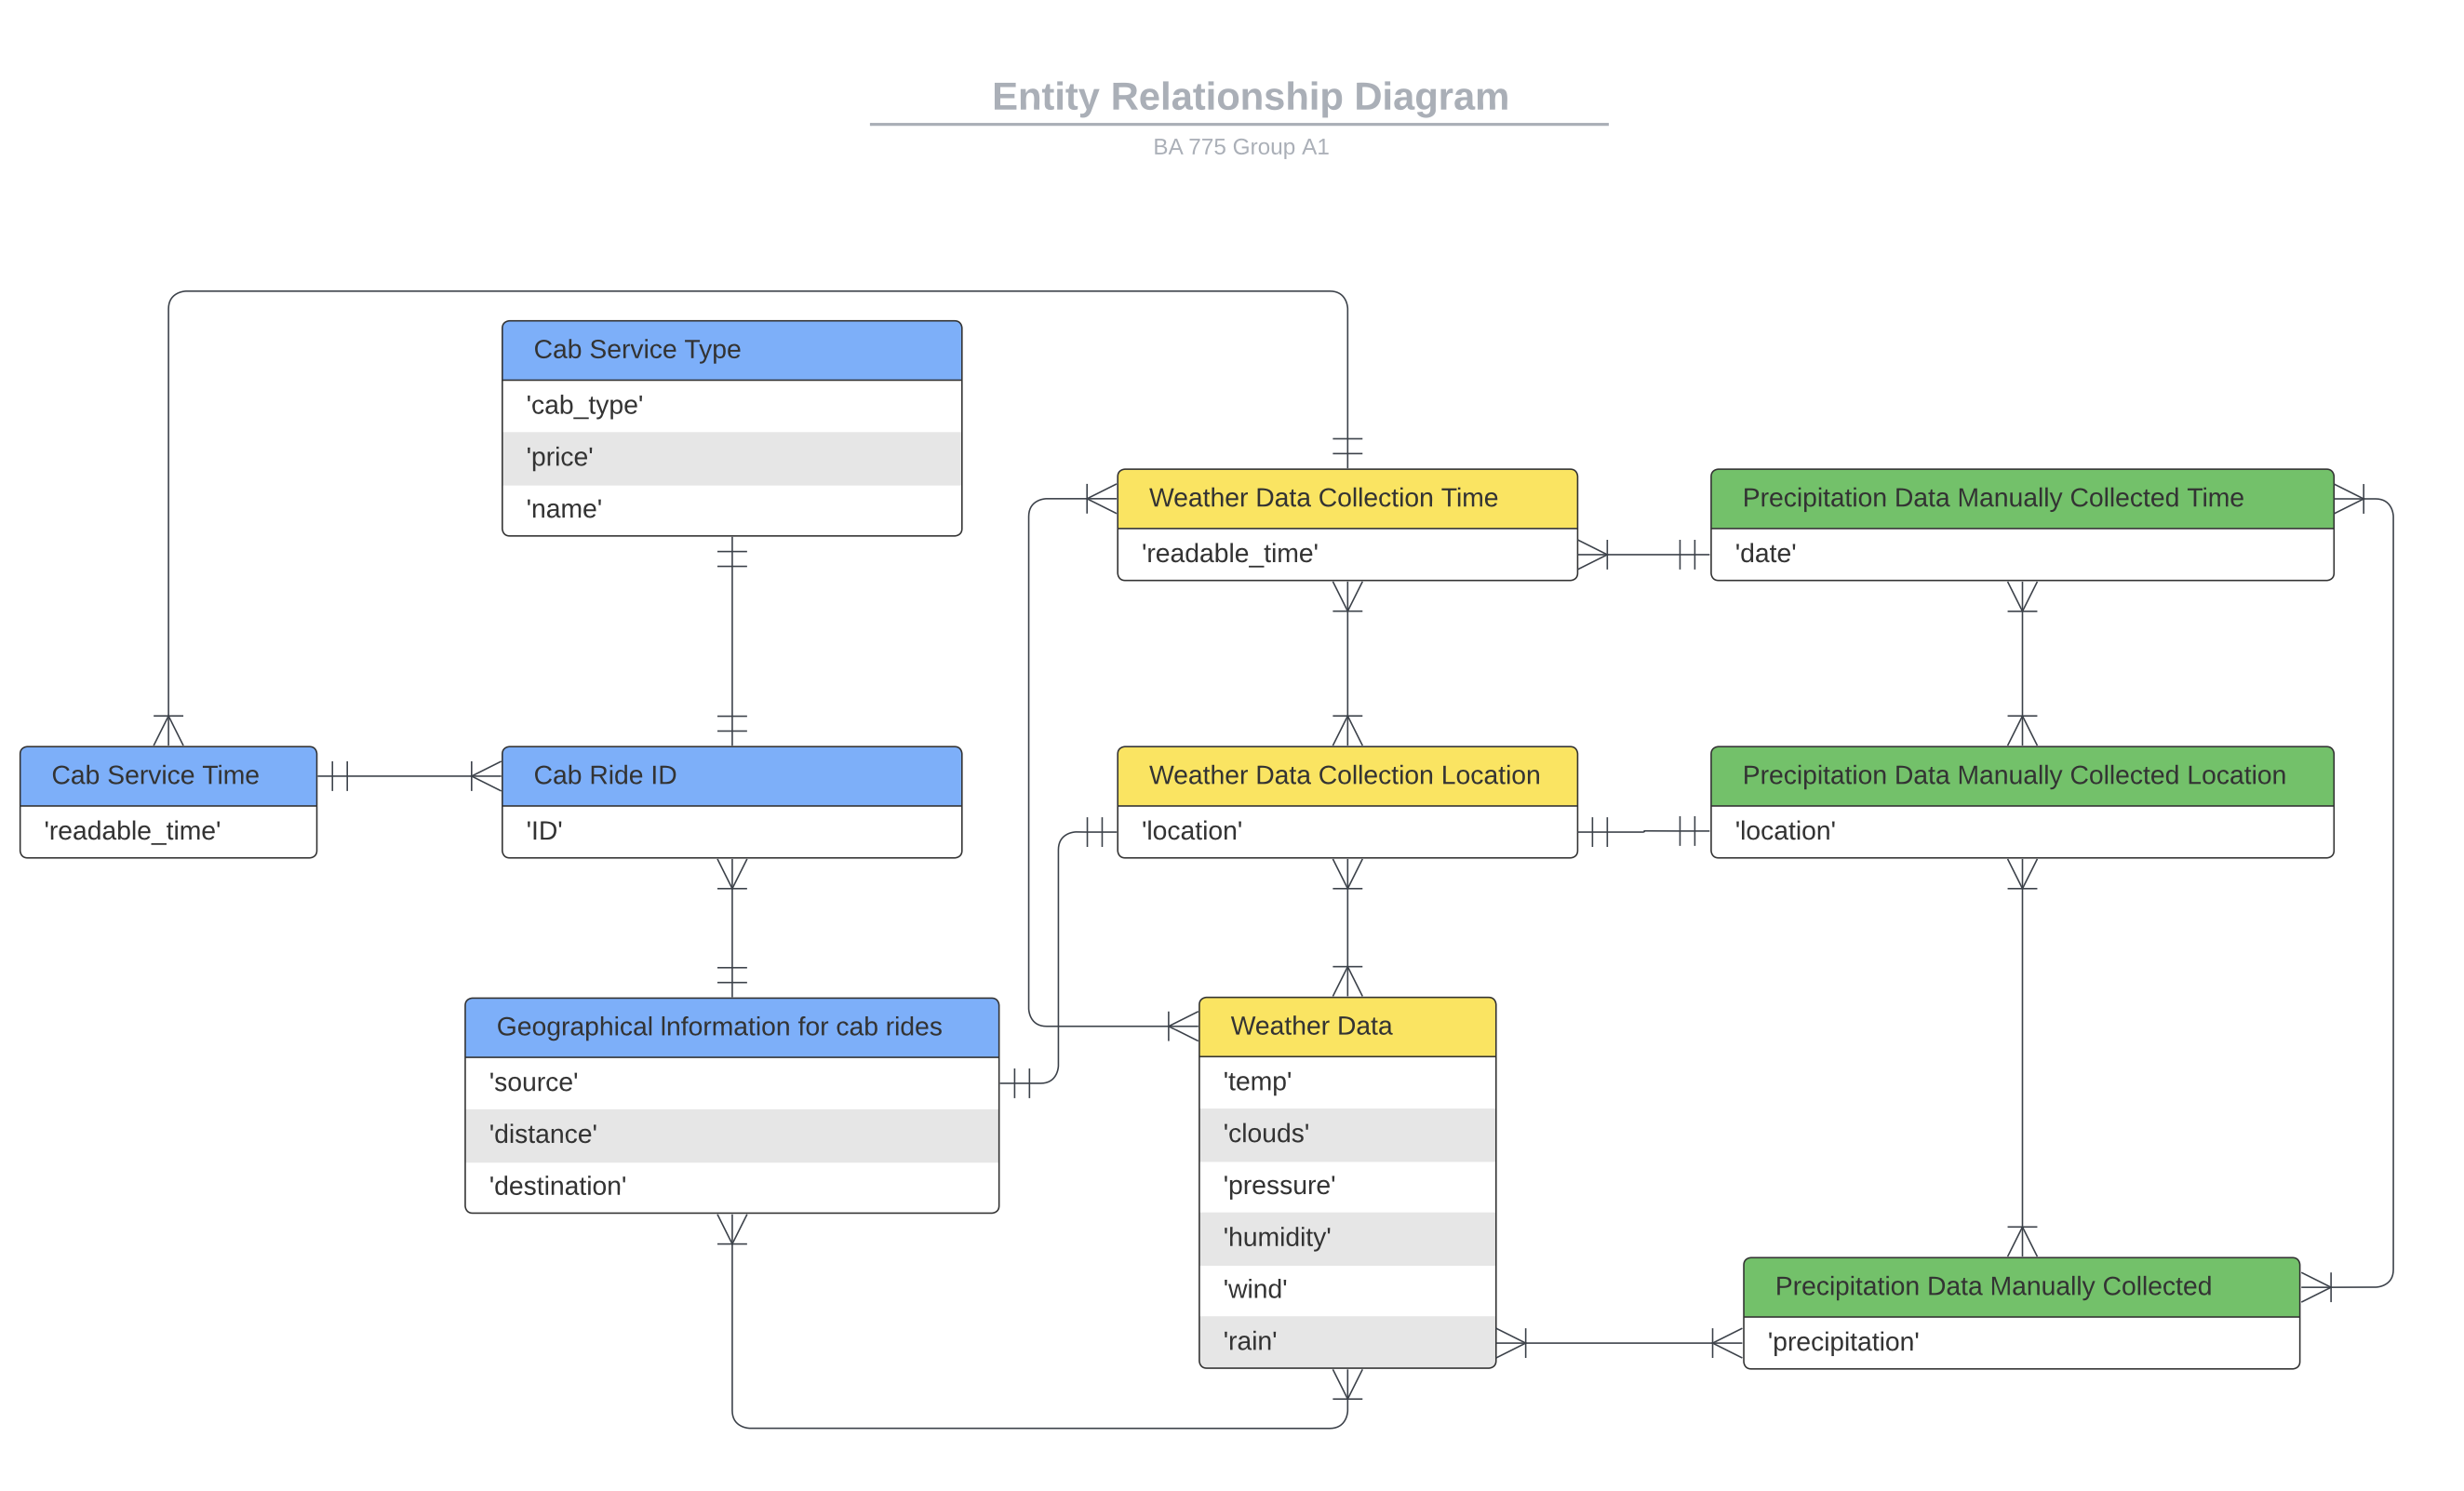

This entity-relationship diagram depicts the relationships between the three datasets we are using, which are the blue table "cab_rides", the yellow table "weather" and the green table "Precipitation_Data_Manually_Collected".

The table "cab_rides" contains data related to rides, including unique id, service type, price, source, destination, distance, time; the table "weather" contains weather-related data, including time, location, and temperature, cloud, pressure, humidity, wind, and rainfall; the table "Precipitation_Data_Manually_Collected" contains rainfall-related data, including time, location, and precipitation.

The table "cab_rides" is connected to table "weather" by matching time with time, source by location and then match the corresponding weather data for each ride; the table "weather" is connected to table "Precipitation_Data_Manually_Collected" by matching time with time, location by location and then replace "rain" in table "weather" by "precipitation" in table "Precipitation_Data_Manually_Collected" because "rain" in table "weather" has verry many missing values; the table "cab_rides" and table "Precipitation_Data_Manually_Collected" are not directly related.

## 4. **Report Summary**

As it is a Boston dataset, we believe our findings will be applicable as students, who need to be on time for class. Especially given the unreliability of the MBTA, we wanted to investigate ride sharing data to see if there were particular times or places for economical rides.
In this report of comparative analysis on ride-hailing services, Uber emerges as more favored than Lyft, perhaps due to marginal pricing differences favoring Uber. Among the different service types, luxury types are more expensive, while shared or pooled options are the cheapest. The Financial District stands out as the most popular destination, while Northeastern serves as the the most popular source of rides, particularly towards Beacon Hill, with no clear pattern to be discerned in terms of timings. Haymarket emerges as the most cost-effective area for rides and destinations. Timing wise, late-night timings exhibit heightened usage, although this does not necessarily translate into higher prices. Additionally, weather conditions significantly impact ridership, showing an increase in demand with escalated severity of rain and temperature, albeit reaching a threshold where extreme weather conditions lead to decreased travel overall. Weather conditions, however, also did not significantly affect prices, leading us to conclude that the service types are the ultimate price indicator for ride share services.

##5. **Introduction and Motivation** <br>

Ride sharing services like Uber and Lyft have become an increasingly popular mode of transport, outcompeting traditional taxi services with cheap prices and even challenging public transit options as well. As students in Boston, it is inevitable that we find ourselves in situations where public transportation becomes unreliable, and we’ve all had to resort to getting an Uber to class in a desperate attempt to not be late, or having to get a Lyft home because it is too late and all public transportation has stopped running for the night. Hence, we had a natural curiosity towards the industry and wanted to dive in further. What were the most popular times of ridership? Were there any patterns we could dig up that would be intuitive, or interesting? Furthermore, rideshare options can be expensive. Were there any pricing insights we could gleam, and maybe identify key price factors so we could score ourselves cheaper rides in the future? With these questions in mind, we decided to do a deep dive into Boston’s Ride Hailing market, focusing our attention on ridership patterns, differences between the two competing companies, pricing analysis, timing influences, and lastly, weather.

## 6. **Data Preprocessing and Table Merging**

After creating a dataset called ‘cab_rides’ and importing two tables: cab_rides and weather, into the dataset, we want to aggregate two tables and deal with missing values. Here are the queries:

Create a new table with timestamps transferred to readable time:

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE cab_rides.cab_rides_with_modified_time AS
SELECT *, TIMESTAMP_MILLIS(time_stamp) as readable_time
FROM `cab_rides.cab_rides`;

Query is running:   0%|          |

""


Update the table with time_stamp and product column removed:

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE cab_rides.cab_rides_time_converted AS
SELECT
   readable_time,
   distance,
   cab_type,
   destination,
   source,
   price,
   surge_multiplier,
   id,
   name,
FROM
   cab_rides.cab_rides_with_modified_time;

Query is running:   0%|          |

""


For the weather table, since we want to merge it into the cab_rides table, we need to harmonize the timescales between these two tables. The service times in the cab_rides table do not exactly match the times when weather information is recorded at weather stations in the weather table, so we made the following adjustments to the weather information in the weather table:
 - For ‘temp’, ‘clouds’, ‘pressure’, ‘humidity’, ‘wind’, we took their mean values in the same hour at the same location.
 - For rain, we summed up the amount of rainfall in the same hour at the same location.

In [ ]:
%%bigquery

CREATE OR REPLACE TABLE `cab_rides.weather_transformed` AS
SELECT
   FORMAT_TIMESTAMP("%Y-%m-%d %H", readable_time) as readable_time,
   location,
   AVG(temp) as temp,
   AVG(clouds) as clouds,
   AVG(pressure) as pressure,
   AVG(humidity) as humidity,
   AVG(wind) as wind,
   SUM(COALESCE(rain, 0)) as rain
FROM
   `cab_rides.weather_modified`
GROUP BY
   readable_time,
   Location;

Query is running:   0%|          |

""


Join two tables together:

In [ ]:
%%bigquery

CREATE OR REPLACE TABLE cab_rides.merged_data_1 AS
SELECT
   crt.* EXCEPT(readable_time),
   wm.*,
   FORMAT_TIMESTAMP("%Y-%m-%d %H", crt.readable_time) AS crt_readable_time,
FROM
   `cab_rides.cab_rides_time_converted` AS crt
JOIN
   `cab_rides.weather_transformed` AS wm
ON
   FORMAT_TIMESTAMP("%Y-%m-%d %H", crt.readable_time) = wm.readable_time
   AND crt.source = wm.location;


Query is running:   0%|          |

""


For the column ‘price’, we impute the missing value by implementing a simple linear regression using ‘price’ as dependent variable & ‘distance’ and ‘name’ as independent variables, since we believe the price of cab ride is correlated with the distance and the service type. Since the ‘name’ is a categorical variable, we need to do one-hot encoding. Here’s the query:

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE ba775-a1-project.cab_rides.merged_data_one_hot_encoded AS
SELECT
 id, -- Include the id column
 distance,
 CASE WHEN name = 'WAV' THEN 1 ELSE 0 END as is_WAV,
 CASE WHEN name = 'Black SUV' THEN 1 ELSE 0 END as is_BlackSUV,
 CASE WHEN name = 'UberXL' THEN 1 ELSE 0 END as is_UberXL,
 CASE WHEN name = 'Taxi' THEN 1 ELSE 0 END as is_Taxi,
 CASE WHEN name = 'Lyft XL' THEN 1 ELSE 0 END as is_LyftXL,
 CASE WHEN name = 'Lux Black' THEN 1 ELSE 0 END as is_LuxBlack,
 CASE WHEN name = 'UberX' THEN 1 ELSE 0 END as is_UberX,
 CASE WHEN name = 'Lyft' THEN 1 ELSE 0 END as is_Lyft,
 CASE WHEN name = 'UberPool' THEN 1 ELSE 0 END as is_UberPool,
 CASE WHEN name = 'Lux Black XL' THEN 1 ELSE 0 END as is_LuxBlackXL,
 CASE WHEN name = 'Black' THEN 1 ELSE 0 END as is_Black,
 CASE WHEN name = 'Shared' THEN 1 ELSE 0 END as is_Shared,
 CASE WHEN name = 'Lux' THEN 1 ELSE 0 END as is_Lux,
 price
FROM
 `ba775-a1-project.cab_rides.merged_data_1`;

Query is running:   0%|          |

""


We deploy a linear regression using BigQueryML:

In [ ]:
%%bigquery
CREATE OR REPLACE MODEL cab_rides.imputed_price_model
OPTIONS(model_type='linear_reg', input_label_cols=['price']) AS
SELECT
 distance,
 is_WAV,
 is_BlackSUV,
 is_UberXL,
 is_Taxi,
 is_LyftXL,
 is_LuxBlack,
 is_UberX,
 is_Lyft,
 is_UberPool,
 is_LuxBlackXL,
 is_Black,
 is_Shared,
 is_Lux,
 price
FROM
 -- The dataset with one-hot encoded categorical columns
 `ba775-a1-project.cab_rides.merged_data_one_hot_encoded`
WHERE
 price IS NOT NULL;

Query is running:   0%|          |

""


We use the predicted price to replace the missing value of ‘price’ for each cab ride:

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE cab_rides.merged_data_with_imputed_prices AS
SELECT
 merged_data_1.*,
 COALESCE(merged_data_1.price, predictions.predicted_price) AS imputed_price
FROM
 `ba775-a1-project.cab_rides.merged_data_1` AS merged_data_1
LEFT JOIN (
   SELECT
     id,
     predicted_price
   FROM
     ML.PREDICT(MODEL cab_rides.imputed_price_model, TABLE `ba775-a1-project.cab_rides.merged_data_one_hot_encoded`)
 ) AS predictions
ON
 merged_data_1.id = predictions.id;

Query is running:   0%|          |

""


Given that the area of Haymarket Square is so small and there are no weather stations set up, we have taken for it the average of the rainfall for WestEnd and NorthEnd, the two areas to the northwest and northeast of it.

In [ ]:
%%bigquery
INSERT INTO cab_rides.rain_by_date (location, date, precipitation)
SELECT 'HaymarketSq', date, AVG(precipitation)
FROM cab_rides.rain_by_date
WHERE location IN ('WestEnd', 'NorthEnd')
GROUP BY date;

Query is running:   0%|          |

""


Given that North Station is a station by the North End and there are no more weather stations set up in the vicinity, we have taken equal values of rainfall for these two areas; Northeastern University's area overlaps most of Fenway, and their neighboring second weather station is already in the Allston area, so we have also taken the their rainfall amounts to equal values.

In [ ]:
%%bigquery
INSERT INTO cab_rides.rain_by_date (location, date, precipitation)
SELECT 'NEU', date, precipitation
FROM cab_rides.rain_by_date
WHERE location = 'Fenway';


INSERT INTO cab_rides.rain_by_date (location, date, precipitation)
SELECT 'NorthStation', date, precipitation
FROM cab_rides.rain_by_date
WHERE location = 'NorthEnd';

Query is running:   0%|          |

""


Synchronize the format of location name in two tables: table with correct precipitation & existing table.

In [ ]:
%%bigquery
UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'Haymarket Square'
WHERE location = 'HaymarketSq';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'Boston University'
WHERE location = 'Kenmore';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'South Station'
WHERE location = 'SouthEnd';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'Financial District'
WHERE location = 'FinancialDist';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'North End'
WHERE location = 'NorthEnd';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'Theatre District'
WHERE location = 'TheatreDist';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'North Station'
WHERE location = 'NorthStation';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'BeaconHill'
WHERE location = 'BeaconHill';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'Back Bay'
WHERE location = 'BackBay';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'West End'
WHERE location = 'WestEnd';


UPDATE `ba775-a1-project.cab_rides.rain_by_date`
SET location = 'Northeastern University'
WHERE location = 'NEU';

Query is running:   0%|          |

""


Edit crt_readable_time’s format, synchronize it with the date in the table with correct precipitation.

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE cab_rides.merged_data_2 AS
SELECT
  mdwip.* EXCEPT (crt_readable_time),
  LEFT(crt_readable_time, LENGTH(crt_readable_time) - 3) AS crt_modified,
FROM
  cab_rides.merged_data_with_imputed_prices AS mdwip;

Query is running:   0%|          |

""


Join the table with precipitation in the existing table, by matching location name & date. Replace null value in rain by precipitation hand-collected.

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE cab_rides.updated_merged_data AS
SELECT
  m.* EXCEPT (crt_modified, source, rain),
  m.crt_modified,
  m.source,
  CASE
    WHEN m.rain = 0 THEN r.precipitation
    ELSE m.rain
  END AS rain,
FROM
  cab_rides.merged_data_2 AS m
JOIN
  cab_rides.rain_by_date AS r
ON
  PARSE_DATE('%Y-%m-%d', m.crt_modified) = r.date AND m.source = r.location;

Query is running:   0%|          |

""


As such, we have a final table for use in analysis titled "updated_merged_data".

## 7. **Analysis and Inference**

### Question 7.1: **What are the main differences in performance between Uber and Lyft?**
#### Uber VS Lyft Analysis Overview

In [ ]:
%%bigquery
--Total Number of Rides for Uber and Lyft:
SELECT
	cab_type,
	COUNT(*) as ride_count
FROM
	`ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY
	cab_type;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,ride_count
0,Lyft,408050
1,Uber,511985


This query retrieves the total number of rides for each cab type. As we can see from the results, there is a difference of almost 104,000 rides between Uber and Lyft with Uber being the more popular cab type brand among the two, making it clear that Uber is the market leader.

#### Average Fare Amount for Uber and Lyft:

In [ ]:
%%bigquery
SELECT
	cab_type,
	AVG(imputed_price) as avg_fare
FROM
	`ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY
	cab_type;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,avg_fare
0,Lyft,17.768374
1,Uber,16.243027


This query is designed to calculate the average fare price for each cab type – Uber and Lyft. As we can see from the results, the difference is approximately 1 dollar and surprisingly lyft is more expensive. This explains why Uber has a higher ride count.

#### Average Ride Distance for Uber and Lyft:

In [ ]:
%%bigquery
SELECT
	cab_type,
	AVG(distance) as avg_distance
FROM
	`ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY
	cab_type;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,avg_distance
0,Lyft,2.299836
1,Uber,2.343234


This query gives a list of cab_type values of Uber and Lyft along with the corresponding average ride distance for each cab type. It provides a summary of the average ride distance for each cab type. As seen by the avg_distance in the results, there is very miniscule difference between the two cab types. The average ride distance for Uber is approximately 2 miles, while for Lyft, it's also approximately 2 miles. The values are very close, with Uber having a slightly higher average ride distance compared to Lyft. This is justified as the distance between two locations is going to be the same irrespective of the cab type.

#### Cab preference by price for different locations

In [ ]:
%%bigquery
--By last location/destination
SELECT cab_type,
 	destination,
 	COUNT(destination) as last_stop_frequency,
 	ROUND(AVG(imputed_price),3) as avg_price
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY cab_type, destination
ORDER BY avg_price
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,destination,last_stop_frequency,avg_price
0,Uber,Haymarket Square,32057,13.953
1,Uber,North End,32021,14.592
2,Lyft,Haymarket Square,25517,14.662
3,Uber,South Station,31933,14.790
4,Uber,Back Bay,53110,14.914


In [ ]:
%%bigquery
--For the source:

SELECT cab_type,
 	source,
 	COUNT(source) as start_point_frequency,
 	ROUND(AVG(imputed_price),3) as avg_price
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY cab_type, source
ORDER BY avg_price
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,source,start_point_frequency,avg_price
0,Uber,Haymarket Square,32007,13.473
1,Lyft,Haymarket Square,25511,13.738
2,Uber,North End,31995,14.780
3,Uber,Theatre District,32144,15.128
4,Uber,Beacon Hill,31838,15.183


The findings in the table reveal a consistent preference for Uber over Lyft at every location, be it the source or destination. This preference is notably driven by a discernible price difference. Haymarket emerges as the most cost-effective area in both tables, possibly attributed to its accessibility to public transportation, presenting commuters with convenient and economical travel choices.

#### Service Type Analysis

Digging deeper into the types of cab rides offered by Uber and Lyft, we sought to understand the different pricing patterns, factors that potentially influence cab price, and relationships between the two.

In [ ]:
%%bigquery

SELECT
    cab_type,
    name,
    ROUND(MIN(imputed_price), 1) AS min_price,
    ROUND(MAX(imputed_price), 1) AS max_price,
    ROUND(APPROX_QUANTILES(imputed_price, 2)[OFFSET(1)], 1) AS median_price,
    COUNT(*) as count
FROM
    ba775-a1-project.cab_rides.updated_merged_data
GROUP BY
    name, cab_type
ORDER BY
    count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,name,min_price,max_price,median_price,count
0,Uber,UberXL,8.0,76.0,16.0,73149
1,Uber,WAV,6.0,44.0,9.5,73148
2,Uber,UberPool,4.5,42.5,8.5,73146
3,Uber,Taxi,10.8,33.0,17.3,73141
4,Uber,UberX,6.0,44.0,9.5,73140
5,Uber,Black SUV,23.0,89.5,29.5,73133
6,Uber,Black,13.5,68.5,19.5,73128
7,Lyft,Lux,10.5,55.0,16.5,68046
8,Lyft,Lux Black,16.5,75.0,22.5,68025
9,Lyft,Lux Black XL,26.0,97.5,32.5,68003


As expected, the most expensive variants for both Uber and Lyft, be it for min, max, or median price, were the luxury options offered by both. This was the "Black SUV" option for Uber and the "Lux Black XL" option for Lyft. On the opposite end of the spectrum, the cheapest options were the shared ride options, "UberPool" and "Shared" Lyfts respectively.

We also see that the most popular service types are UberXL, Uber WAV (Wheelchair Accessible Vehicles), and UberPool. This suggests that Uber is commonly used for large groups of people, disabled people who may not have access to public transportation, and individuals looking to save money by using UberPool. All Uber service types were more popular than Lyft, with even the least popular Uber service (Uber Black) being more popular than the best performing Lyft service (Lyft Lux), showing Uber's dominance in the Boston market.

Next, we wanted to examine the pricing structure for the different service types - was there a difference for the base fare? What about for the surge multipliers?

In [ ]:
%%bigquery

WITH PriceByDistanceAndName AS (
    SELECT
        name,
        distance,
        AVG(imputed_price) as average_price
    FROM
        ba775-a1-project.cab_rides.updated_merged_data
    WHERE
        name IN ('Taxi', 'Lux Black', 'Black', 'UberXL', 'Black SUV', 'Lyft XL',
                 'UberPool', 'Lux Black XL', 'Shared', 'WAV', 'Lyft', 'Lux', 'UberX')
    GROUP BY
        name, distance
    ORDER BY
        name, distance
),
PriceChanges AS (
    SELECT
        name,
        distance,
        average_price,
        average_price - LAG(average_price) OVER (PARTITION BY name ORDER BY distance) as price_increase
    FROM
        PriceByDistanceAndName
)
SELECT
    name,
    ARRAY_AGG(STRUCT(distance, average_price, price_increase)) as distance_price_data
FROM
    PriceChanges
GROUP BY
    name
ORDER BY
    name;



Query is running:   0%|          |

Downloading:   0%|          |

,name,distance_price_data
0,Black,"[{'distance': 0.02, 'average_price': 15.0, 'pr..."
1,Black SUV,"[{'distance': 0.02, 'average_price': 27.5, 'pr..."
2,Lux,"[{'distance': 0.39, 'average_price': 10.930232..."
3,Lux Black,"[{'distance': 0.39, 'average_price': 16.928571..."
4,Lux Black XL,"[{'distance': 0.39, 'average_price': 27.325581..."
5,Lyft,"[{'distance': 0.39, 'average_price': 7.2209302..."
6,Lyft XL,"[{'distance': 0.39, 'average_price': 9.1395348..."
7,Shared,"[{'distance': 0.39, 'average_price': 4.7674418..."
8,Taxi,"[{'distance': 0.02, 'average_price': 10.753814..."
9,UberPool,"[{'distance': 0.02, 'average_price': 6.5, 'pri..."


To calculate the base price, we used the smallest distance traveled as the base unit, and then calculate the average price travelled per mile for each service type. From here, we can see that the base price of Lyft Shared is the cheapest at USD4.77 per mile, and the most expensive was Lyft Black XL at USD27.32. Moving on, we wondered how surge multipliers may affect the price.

In [ ]:
%%bigquery

--Surge pricing analysis
SELECT
    cab_type,
    name,
    surge_multiplier,
    ROUND(AVG(imputed_price / distance), 2) AS avg_price_per_mile
FROM
    ba775-a1-project.cab_rides.updated_merged_data
GROUP BY
    name, surge_multiplier, cab_type
ORDER BY
    name, surge_multiplier, cab_type;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,name,surge_multiplier,avg_price_per_mile
0,Uber,Black,1.00,11.33
1,Uber,Black SUV,1.00,17.62
2,Lyft,Lux,1.00,8.91
3,Lyft,Lux,1.25,10.38
4,Lyft,Lux,1.50,11.73
5,Lyft,Lux,1.75,13.76
6,Lyft,Lux,2.00,15.59
7,Lyft,Lux Black,1.00,11.74
8,Lyft,Lux Black,1.25,13.79
9,Lyft,Lux Black,1.50,15.45


We were also curious about how the surge multiplier would differ between service types and differ between different distances traveled for each service type. What we found was that there was not a linear relationship between the surge multiplier and the average price per mile for each specific service type.

Given that this relationship is not linear, we theorize that there must be other factors affecting the surge multiplier rates. Hence, we decided to add rain as an additional angle of analysis below, guessing that rain would affect surge multiplier rates across service types.

In [ ]:
%%bigquery

SELECT
  rain.name,
  rain.rain_range,
  COUNT(*) AS num_of_rides,
  AVG(rain.imputed_price) AS price,
  AVG(rain.surge_multiplier) AS surge_multiplier
FROM (
  SELECT
    CASE
      WHEN rain = 0 THEN 'No Rain'
      ELSE 'Rain' END AS rain_range,
    name,
    imputed_price,
    surge_multiplier
  FROM `ba775-a1-project.cab_rides.updated_merged_data`
  WHERE
    name IN ('Taxi', 'Lux Black', 'Black', 'UberXL', 'Black SUV', 'Lyft XL',
             'UberPool', 'Lux Black XL', 'Shared', 'WAV', 'Lyft', 'Lux', 'UberX')
) rain
GROUP BY
  rain.name, rain.rain_range
ORDER BY
  rain.name, num_of_rides DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,name,rain_range,num_of_rides,price,surge_multiplier
0,Black,No Rain,41426,20.849044,1.000000
1,Black,Rain,31702,20.799634,1.000000
2,Black SUV,No Rain,41452,30.698205,1.000000
3,Black SUV,Rain,31681,30.575329,1.000000
4,Lux,No Rain,38719,18.318552,1.043125
5,Lux,Rain,29327,18.221673,1.041302
6,Lux Black,No Rain,38747,23.684974,1.041455
7,Lux Black,Rain,29278,23.569928,1.043403
8,Lux Black XL,No Rain,38667,32.900887,1.041967
9,Lux Black XL,Rain,29336,32.867359,1.042865


However, after running additional queries above, we found that rain also had no significant impact on surge multipier rates within service types. After doing some further secondary research, we find that the main contributor for surge multiplier rates are the relationship between driver availability and customer demand for rides (Reference #5), which we cannot extrapolate from our dataset. Further more, we find that the main contributor for price is actually distance travelled and service type of the ride, with surge multiplier playing a smaller role.

**In conclusion for Question 1, we see that Uber is performing better in the Boston market than Lyft, with higher ride counts which may be attributed to marginally lower prices despite similar distances taken as Lyft. Breakdowns of popularity of service types is intuitive, with the most expensive service types being luxury types and the cheapest types being shared types. Uber's service types are also outperforming all of Lyft's service types, however, our dataset was inconclusive in identified the source of surge multipier differences and had to seek additional insight from outside sources.**

### Question 7.2: **How does distance, location and price affect ridership?**

After exploring the broad trends, we wanted to dive deeper and see if there were any more nuanced trends affecting user ridership behaviour, specifically looking into distance, location and price as our first major factors.

#### Average price based on distance range traveled

In [ ]:
%%bigquery

SELECT
  CASE
    WHEN distance < 1 THEN '0-1'
    WHEN distance >= 1 AND distance < 2 THEN '1-2'
    WHEN distance >= 2 AND distance < 3 THEN '2-3'
    WHEN distance >= 3 AND distance < 4 THEN '3-4'
    ELSE '4+'
    END AS distance_range,
  AVG(imputed_price) AS avg_imputed_price
FROM
  `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY
  distance_range
ORDER BY
  distance_range;

Query is running:   0%|          |

Downloading:   0%|          |

,distance_range,avg_imputed_price
0,0-1,12.588560
1,1-2,14.231392
2,2-3,17.445593
3,3-4,20.023464
4,4+,23.637455


There is a clear pattern towards an increase in the average imputed price with increasing distance range. The increasing order of the distance ranges (0-1, 1-2, 2-3, 3-4, 4+) and the correspondingly rising average imputed prices make this clear. '4+', the final category includes rides longer than four miles. The much higher average imputed price in this category implies that longer rides might be more expensive or have a different pricing structure.

#### Most frequented route for ride hailing

In [ ]:
%%bigquery

SELECT CONCAT(source,' - ', destination ) as ride,
 	COUNT(*) as no_of_rides,
 	ROUND(AVG(distance),3) as avg_dis,
 	ROUND(AVG(imputed_price),3) as avg_ride_cost
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY ride
ORDER BY no_of_rides DESC, avg_ride_cost DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,ride,no_of_rides,avg_dis,avg_ride_cost
0,Northeastern University - Beacon Hill,48275,2.535,16.938
1,Northeastern University - North Station,48065,3.221,19.899
2,Northeastern University - Theatre District,47950,2.078,16.183
3,Northeastern University - Financial District,47940,4.177,22.641
4,Northeastern University - Back Bay,47655,1.493,13.817
...,...,...,...,...
67,West End - North End,9163,1.124,13.414
68,West End - Haymarket Square,9128,0.753,12.773
69,Haymarket Square - West End,9127,0.639,12.525
70,South Station - North Station,9117,1.991,15.794


The table shows the most frequented ride pairs - source to destination trips taken. The most popular route taken is the Northeastern University - Beacon Hill with the maximum rides, with the distance of around 2.5 miles costing about USD 17 per ride. Even though the locations are connected via public transport, a major part of the trip would have to be covered by foot vs an eight min cab ride to reach the destination. The least frequented is North Station - South Station which is about 2 miles costing USD 15 per ride. Both being a public transport station, a direct train route takes just 15 mins.

#### What are the most popular pick up and drop-off locations for Uber and Lyft?

In [ ]:
%%bigquery

SELECT
	cab_type,
	source,
	COUNT(*) as pickup_count
FROM
	`ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY
	cab_type, source
ORDER BY
	pickup_count DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,source,pickup_count
0,Uber,Northeastern University,159975
1,Lyft,Northeastern University,127435
2,Uber,Financial District,32444
3,Uber,Theatre District,32144
4,Uber,Back Bay,32017


This query shows the pickup location source with the highest number of pickups for each cab type, orders the result by pickup count in descending order, and then selects only the top row which is the combination of cab type and source with the highest pickup count. The results show that the most popular source location is Northeastern University for both cab types. This can be because Boston is a student hub and Northeastern University has the maximum population of students enrolled. Perhaps many students, especially graduate students, stay far away from campus to avoid expensive rent and hence, sometimes have to take the cab to travel, especially to get home from class. Here also, we see that the pickup ride count for Uber is significantly higher as compared to Lyft, reinstating that Uber is the more preferred cab type.

In [ ]:
%%bigquery

SELECT
	cab_type,
	source,
	COUNT(*) as pickup_count
FROM
	`ba775-a1-project.cab_rides.updated_merged_data`
WHERE
	cab_type IN ('Lyft')
GROUP BY
	cab_type, source
ORDER BY
	pickup_count DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,source,pickup_count
0,Lyft,Northeastern University,127435
1,Lyft,Financial District,26145
2,Lyft,Back Bay,25550
3,Lyft,North End,25512
4,Lyft,Haymarket Square,25511


Repeating the same query for Lyft, this information provides insights into the most frequent pickup location for Lyft rides. From the results, it is clear that Northeastern University is the most preferred pickup location followed by Financial District. The lead is maintained by a surprisingly huge margin, which goes to show just how popular the location of Northeastern University is when compared to other locations.

In [ ]:
%%bigquery
SELECT
	cab_type,
	destination,
	COUNT(*) as dropoff_count
FROM
	`ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY
	cab_type, destination
ORDER BY
	dropoff_count DESC
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,destination,dropoff_count
0,Uber,Financial District,53695


In [ ]:
%%bigquery
SELECT
	cab_type,
	destination,
	COUNT(*) as dropoff_count
FROM
	`ba775-a1-project.cab_rides.updated_merged_data`
WHERE
	cab_type IN ('Lyft')
GROUP BY
	cab_type, destination
ORDER BY
	dropoff_count DESC
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,destination,dropoff_count
0,Lyft,Financial District,43257


Repeating the same query but this time to find the destination, again, Financial District seems like the most popular destinations where rides end for both Uber and Lyft. However, we see that the ride dropoff count is much higher for Uber than Lyft. Financial District is Bostons main downtown area and is the main business nerve center, crowded with banks, high-rise offices and sleek condos. The highest destination ride count to this location means that most people who are working, may prefer to take the cab to get to their work place in the morning if they don’t have their own car. Thus, it is justified why Financial District is the most popular dropoff location for both Uber and Lyft.

#### Timing Analysis for Most Popular Destination and Source Locations

##### Destination: Financial District

We hypothesized that the reason why Financial District was such a popular location is because most people are using it to get to their place of work. Hence, we ran the below analysis to see which timings had the highest ridership numbers where the Financial District is the destination.

In [ ]:
%%bigquery

SELECT
  destination,
  SUBSTRING(readable_time, 12, 2) AS hour,
  COUNT(*) AS count
FROM
  `ba775-a1-project.cab_rides.updated_merged_data.`
WHERE
  destination = 'Financial District'
GROUP BY
  hour, destination
ORDER BY
  count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,destination,hour,count
0,Financial District,18,4579
1,Financial District,14,4480
2,Financial District,00,4443
3,Financial District,17,4439
4,Financial District,10,4403
5,Financial District,11,4341
6,Financial District,13,4285
7,Financial District,16,4239
8,Financial District,15,4237
9,Financial District,12,4232


In [ ]:
%%bigquery

SELECT
  destination,
  EXTRACT(DAYOFWEEK FROM PARSE_TIMESTAMP('%Y-%m-%d %H', readable_time)) AS day_of_week,
  COUNT(*) AS count
FROM
  `ba775-a1-project.cab_rides.updated_merged_data`
WHERE
  destination = 'Financial District'
GROUP BY
  day_of_week, destination
ORDER BY
  count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,destination,day_of_week,count
0,Financial District,3,17393
1,Financial District,2,17065
2,Financial District,5,13825
3,Financial District,7,13248
4,Financial District,1,12709
5,Financial District,6,12400
6,Financial District,4,10312


However, from the above table, we can see that there aren't big differences in timing. In fact, the most popular time to arrive at the Financial District is 6pm, contrary to what we have believed. After further research, we discovered that the Financial District also has many restaurants and residential units, making it a multi-zonal neighborhood with a lot of different types of inbound traffic. Hence, the Financial District being the most popular destination speaks to it's vibracy as a whole, and cannot solely be attributed to it's high concentration of office buildings. We do see that weekdays are slightly more popular, especially on Monday and Tuesday, which may reflect that after the weekend, more people are likely to resort to using Uber and Lyft after the weekend fun, perhaps experiencing a classic case of the Monday Blues.

##### Source: Northeastern University

In [ ]:
%%bigquery

SELECT
  source,
  SUBSTRING(readable_time, 12, 2) AS hour,
  COUNT(*) AS count
FROM
  `ba775-a1-project.cab_rides.updated_merged_data.`
WHERE
  source = 'Northeastern University'
GROUP BY
  hour, source
ORDER BY
  count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,source,hour,count
0,Northeastern University,22,13105
1,Northeastern University,15,13075
2,Northeastern University,00,13015
3,Northeastern University,17,12785
4,Northeastern University,18,12770
5,Northeastern University,13,12760
6,Northeastern University,12,12710
7,Northeastern University,16,12670
8,Northeastern University,14,12580
9,Northeastern University,09,12490


In [ ]:
%%bigquery

SELECT
  source,
  EXTRACT(DAYOFWEEK FROM PARSE_TIMESTAMP('%Y-%m-%d %H', readable_time)) AS day_of_week,
  COUNT(*) AS count
FROM
  `ba775-a1-project.cab_rides.updated_merged_data`
WHERE
  source = 'Northeastern University'
GROUP BY
  day_of_week, source
ORDER BY
  count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,source,day_of_week,count
0,Northeastern University,2,51825
1,Northeastern University,3,50775
2,Northeastern University,5,41260
3,Northeastern University,1,38125
4,Northeastern University,7,37415
5,Northeastern University,6,36270
6,Northeastern University,4,31740


Looking into the most popular source of rides, Northeastern University, we similarly found that Monday is the most popular day for rides, which emphasizes our "Monday Blues" theory. Timings showed less insights - the most popular time for rides to originate from Northeastern University were 10pm and 3pm, but the differences from one time frame to another was very small and likely statistically insignificant.

**In all, intuitively, there is a clear positive relationship between distance and price. Location wise, we see interesting geographical trends that reflect Boston's two main commuting populations - students and office workers, with Northeastern University and Financial District being popular sources and destinations of rides respectively. Furthermore, even though Boston is well connected through public transport, we can see certain "cold zones" in public transit connectivity (like Northeastern to Beacon Hill) where Uber/Lyft rides become a more favorable alternative. Further analysis on timing did not yield significant insight, but did show the popularity of Monday and Tuesday among Uber and Lyft users for the service.**

### Question 7.3: **How does timing influence ridership frequency?**

Another aspect of ridership we wanted to explore was that of timing. Specifically, which hours of the day would encourage the most ridership? What about specific days in the week?

#### Most popular hour of the day

In [ ]:
%%bigquery
SELECT
EXTRACT(hour FROM PARSE_TIMESTAMP('%Y-%m-%d %H', readable_time)) AS hours_of_day,
COUNT(*) as num_of_rides
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY hours_of_day
ORDER BY num_of_rides DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,hours_of_day,num_of_rides
0,0,42825
1,23,41863
2,15,40843
3,17,40612
4,18,40600
5,13,40592
6,12,40552
7,16,40520
8,14,40448
9,10,40276


We can see that the most popular hours of the day are at midnight and at 11pm, which suggests that people are more likely to use ride share services late at night. One reason for this may be because public transportation, especially the buses, usually discontinue service around 11 and the T also discontinues service around midnight, leaving people with less options to get around. Another reason may be because people participating in night life may be inebriated and hence prefer faster modes of transportation to get to the function or to get home after a night out.

#### Most popular day of week - note 1 is Sunday

In [ ]:
%%bigquery
SELECT
EXTRACT(dayofweek FROM PARSE_TIMESTAMP('%Y-%m-%d %H', readable_time)) AS day_of_week,
COUNT(*) as num_of_rides
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY day_of_week
ORDER BY num_of_rides DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,day_of_week,num_of_rides
0,2,165676
1,3,163385
2,5,131513
3,1,122030
4,7,120100
5,6,119028
6,4,98303


From this table, we can see that Monday and Tuesday are by far the most popular days in the week when it comes to ridership numbers, which suggests that there are a lot of people who use Uber to get to work post-weekend blues. This also aligns with what we have learnt previously about the Financial District being the most popular destination for rides, which suggests that commuting is a key driver for ridership for Uber and Lyft.

In [ ]:
%%bigquery

-- Price VS Hour of Day
SELECT
EXTRACT(hour FROM PARSE_TIMESTAMP('%Y-%m-%d %H', readable_time)) AS hours_of_day,
AVG(imputed_price) AS price
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY hours_of_day
ORDER BY price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,hours_of_day,price
0,20,17.021361
1,17,17.019861
2,19,17.014764
3,14,16.971481
4,22,16.959853
5,11,16.953819
6,9,16.946248
7,4,16.932015
8,3,16.927393
9,5,16.923802


In [ ]:
%%bigquery

--Price VS Hour of Day VS Service Type
SELECT
cab_type,
name,
EXTRACT(hour FROM PARSE_TIMESTAMP('%Y-%m-%d %H', readable_time)) AS hours_of_day,
AVG(imputed_price) AS price
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY hours_of_day, cab_type, name
ORDER BY price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,name,hours_of_day,price
0,Lyft,Lux Black XL,20,33.478634
1,Lyft,Lux Black XL,11,33.311289
2,Lyft,Lux Black XL,17,33.131537
3,Lyft,Lux Black XL,13,33.127305
4,Lyft,Lux Black XL,14,33.071669
...,...,...,...,...
307,Lyft,Shared,14,6.136181
308,Lyft,Shared,23,6.132733
309,Lyft,Shared,9,6.122991
310,Lyft,Shared,1,6.110131


Afterwards, we were curious to see if this difference in ridership would affect pricing. However, after conducting further analysis above, we can see that timing was not a big contributor to any pricing differences, with the changes in prices being very small and likely statistically insignificant. Instead, service type was a much stronger indicator for price, with Lyft service type being generally more expensive than Uber service types of a similar calibre.

In [ ]:
%%bigquery

--Price vs Day of Week - note 1 is Sunday
SELECT
EXTRACT(dayofweek FROM PARSE_TIMESTAMP('%Y-%m-%d %H', readable_time)) AS day_of_week,
AVG(imputed_price) AS price
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY day_of_week
ORDER BY price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,day_of_week,price
0,3,16.977902
1,7,16.964861
2,1,16.932227
3,5,16.926134
4,4,16.902418
5,2,16.874995
6,6,16.849569


In [ ]:
%%bigquery

--Price vs Day of Week vs Service Type
SELECT
cab_type,
name,
EXTRACT(dayofweek FROM PARSE_TIMESTAMP('%Y-%m-%d %H', readable_time)) AS day_of_week,
AVG(imputed_price) AS price
FROM `ba775-a1-project.cab_rides.updated_merged_data`
GROUP BY day_of_week, cab_type, name
ORDER BY price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,name,day_of_week,price
0,Lyft,Lux Black XL,3,33.027336
1,Lyft,Lux Black XL,4,32.970489
2,Lyft,Lux Black XL,7,32.963754
3,Lyft,Lux Black XL,2,32.864169
4,Lyft,Lux Black XL,1,32.863586
...,...,...,...,...
86,Lyft,Shared,6,6.231307
87,Lyft,Shared,3,6.205988
88,Lyft,Shared,4,6.189479
89,Lyft,Shared,5,6.182092


Conclusions for day of the week are similar - the day of the week barely affects price at all, with all prices hovering from USD 16.8 to USD 16.9 with only a few cents difference. However, huge price differences are observed when we segment this information by service type, showing that service type is a much more impactful metric for price than day of week.

**To summarize, ridership increases at night when alternative options are low and safety concerns increase. Ridership also increases in peak commuting days like Monday and Tuesday, especially after the weekend blues. Upon further analysis, pricing metrics are not affected by day or hour of the ride, and service types served as a much stronger price indicator.**

### Question 7.4: **How does weather influence ridership frequency?**

Boston is known for having irratic and cold weather. We wanted to see if this would affect ridership numbers, and hypothesized that colder temperatures would coincide with increased cab rides taken. Increased rain was also a factor we wanted to explore.

#### Temperature vs Ridership

In [ ]:
%%bigquery
SELECT
temp.range_of_temps,
COUNT(*) AS num_of_rides
FROM
(SELECT CASE
  WHEN temp BETWEEN 16 and 20 then '16-20'
  WHEN temp BETWEEN 21 and 25 then '21-25'
  WHEN temp BETWEEN 26 and 30 then '26-30'
  WHEN temp BETWEEN 31 and 35 then '31-35'
  WHEN temp BETWEEN 36 and 40 then '36-40'
  WHEN temp BETWEEN 41 and 45 then '41-45'
  WHEN temp BETWEEN 46 and 50 then '46-50'
  WHEN temp BETWEEN 51 and 55 then '51-55'
  ELSE '55-60' END AS range_of_temps
FROM `ba775-a1-project.cab_rides.updated_merged_data`) temp
GROUP BY temp.range_of_temps
ORDER BY num_of_rides DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,range_of_temps,num_of_rides
0,41-45,255117
1,36-40,222104
2,55-60,205303
3,31-35,78236
4,26-30,57818
5,46-50,54431
6,51-55,21414
7,21-25,20025
8,16-20,5587


From this table we can see that when temperatures are lower (36-40, 41-45 degrees), ridership increases, suggesting that cold temperatures can drive Uber/Lyft popularity, as it becomes a more popular travel option than public transit or walking. However, very interestingly, if temperature dips below 36 degrees, ridership popularity drastically decreases, with the least popular temperature range actually being the lowest one (16-20 degrees). This suggests that ride numbers increase as temperature decreases up to a certain inflection point, where people probably no longer want to leave the house at all and reduce trips outside as a whole.

To deepen our analysis, we wondered if there would be a difference in popularity for different service types as the weather got colder.

In [ ]:
%%bigquery

--Temperature vs ridership vs cab types -- MAYBE make into arrays?
SELECT
cab_type,
temp.range_of_temps,
COUNT(*) AS num_of_rides,
name
FROM
(SELECT imputed_price, CASE
  WHEN temp BETWEEN 17.5 and 19 then '17.5-19'
  WHEN temp BETWEEN 19 and 21.5 then '19-21.5'
  WHEN temp BETWEEN 21.5 and 24 then '21.5-24'
  WHEN temp BETWEEN 24 and 26.5 then '24-26.5'
  WHEN temp BETWEEN 26.5 and 29 then '26.5-29'
  WHEN temp BETWEEN 29 and 31.5 then '29-31.5'
  WHEN temp BETWEEN 31.5 and 34 then '31.5-34'
  WHEN temp BETWEEN 34 and 36.5 then '34-36.5'
  WHEN temp BETWEEN 36.5 and 39 then '36.5-39'
  WHEN temp BETWEEN 39 and 41.5 then '39-41.5'
  WHEN temp BETWEEN 41.5 and 44 then '41.5-44'
  WHEN temp BETWEEN 44 and 46.5 then '44-46.5'
  WHEN temp BETWEEN 46.5 and 49 then '46.5-49'
  WHEN temp BETWEEN 49 and 51.5 then '49-51.5'
  WHEN temp BETWEEN 51.5 and 54 then '51.5-54'
  WHEN temp BETWEEN 54 and 56.5 then '54-56.5'
  ELSE '56.5-59' END AS range_of_temps,
  cab_type,
  name
FROM `ba775-a1-project.cab_rides.updated_merged_data`) temp
GROUP BY temp.range_of_temps, cab_type, name
ORDER BY num_of_rides DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,range_of_temps,num_of_rides,name
0,Uber,39-41.5,15490,Taxi
1,Uber,39-41.5,15479,Black SUV
2,Uber,39-41.5,15471,WAV
3,Uber,39-41.5,15392,Black
4,Uber,39-41.5,15389,UberPool
...,...,...,...,...
190,Lyft,54-56.5,558,Lux Black XL
191,Lyft,54-56.5,549,Lux Black
192,Lyft,54-56.5,545,Shared
193,Lyft,54-56.5,545,Lux


To go a step further in our analysis, we added another dimension to the table - cab types to see if perhaps UberPool or other shared types of Uber/Lyft would be more popular in colder temperatures. After doing so, we found that there was no discernable pattern - at certain temperatures, Uber would be more popular than Lyft, but at other temperatures, Lyft would be more popular than Uber. Overall, thought, the most rides were taken during the temperature range of 39-41.5 by Uber Taxis.

#### Cloud cover vs ridership

In [ ]:
%%bigquery

SELECT
cloud.cloud_cover_range,
COUNT(*) AS num_of_rides
FROM
(SELECT CASE
  WHEN clouds BETWEEN 0 and 0.09 then '0-0.09'
  WHEN clouds BETWEEN 0.1 and 0.19 then '0.1-0.19'
  WHEN clouds BETWEEN 0.2 and 0.29 then '0.2-0.29'
  WHEN clouds BETWEEN 0.3 and 0.39 then '0.3-0.39'
  WHEN clouds BETWEEN 0.4 and 0.49 then '0.4-0.49'
  WHEN clouds BETWEEN 0.5 and 0.59 then '0.5-0.59'
  WHEN clouds BETWEEN 0.6 and 0.69 then '0.6-0.69'
  WHEN clouds BETWEEN 0.7 and 0.79 then '0.7-0.79'
  WHEN clouds BETWEEN 0.8 and 0.89 then '0.8-0.89'
  ELSE '0.9-1' END AS cloud_cover_range
FROM `ba775-a1-project.cab_rides.updated_merged_data`) cloud
GROUP BY cloud.cloud_cover_range
ORDER BY num_of_rides DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,cloud_cover_range,num_of_rides
0,0.9-1,349294
1,0.8-0.89,98448
2,0.4-0.49,78410
3,0.5-0.59,71074
4,0.7-0.79,68570
5,0.6-0.69,64646
6,0-0.09,58107
7,0.1-0.19,47390
8,0.2-0.29,44060
9,0.3-0.39,40036


From this table, we can see that when there’s really high cloud cover (0.8-0.89, 0.9-1), ridership increases by a lot, which suggests that when it’s likely to rain, ridership increases. However, as we see from the rain table below, the most rides actually don’t occur when there is the most rain, but rather when there is a mid-range of rain. This suggests a similar pattern to temperature, where more rain does increase ridership, but only to a certain extent, after which the rain is so heavy it discourages travel as a whole, hence decreasing ridership numbers as well.

#### Rain vs ridership

In [ ]:
%%bigquery

SELECT
temp.range_of_temps,
COUNT(*) AS num_of_rides
FROM
(SELECT imputed_price, CASE
  WHEN temp BETWEEN 17.5 and 19 then '17.5-19'
  WHEN temp BETWEEN 19 and 21.5 then '19-21.5'
  WHEN temp BETWEEN 21.5 and 24 then '21.5-24'
  WHEN temp BETWEEN 24 and 26.5 then '24-26.5'
  WHEN temp BETWEEN 26.5 and 29 then '26.5-29'
  WHEN temp BETWEEN 29 and 31.5 then '29-31.5'
  WHEN temp BETWEEN 31.5 and 34 then '31.5-34'
  WHEN temp BETWEEN 34 and 36.5 then '34-36.5'
  WHEN temp BETWEEN 36.5 and 39 then '36.5-39'
  WHEN temp BETWEEN 39 and 41.5 then '39-41.5'
  WHEN temp BETWEEN 41.5 and 44 then '41.5-44'
  WHEN temp BETWEEN 44 and 46.5 then '44-46.5'
  WHEN temp BETWEEN 46.5 and 49 then '46.5-49'
  WHEN temp BETWEEN 49 and 51.5 then '49-51.5'
  WHEN temp BETWEEN 51.5 and 54 then '51.5-54'
  WHEN temp BETWEEN 54 and 56.5 then '54-56.5'
  ELSE '56.5-59' END AS range_of_temps
FROM `ba775-a1-project.cab_rides.updated_merged_data`) temp
GROUP BY temp.range_of_temps
ORDER BY num_of_rides DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,range_of_temps,num_of_rides
0,39-41.5,194474
1,36.5-39,140905
2,41.5-44,130485
3,44-46.5,123601
4,34-36.5,61777
5,31.5-34,59630
6,29-31.5,51349
7,46.5-49,38769
8,26.5-29,28322
9,49-51.5,25194


As explained above, we see that moderate rainfall encourages increased ridership, but severe rainfall actually discourages ridership. This is likely as heavy rainfall discourages travel as a whole, but mild rainfall merely makes other transit options seem less attractive (walking, bus, T, biking etc), which makes Uber/Lyft rides more appealing.

In [ ]:
%%bigquery

--Rain vs ridership vs price
SELECT
rain.rain_range,
COUNT(*) AS num_of_rides,
AVG(imputed_price) AS price,
AVG(surge_multiplier) AS surge_multiplier,
cab_type,
name
FROM
(SELECT CASE
  WHEN rain = 0 then '0'
  ELSE '1' END AS rain_range,
  imputed_price,
  surge_multiplier,
  cab_type,
  name
FROM `ba775-a1-project.cab_rides.updated_merged_data`) rain
GROUP BY rain.rain_range, cab_type, name
ORDER BY num_of_rides DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,rain_range,num_of_rides,price,surge_multiplier,cab_type,name
0,0,41600,16.143738,1.000000,Uber,UberXL
1,0,41473,8.843923,1.000000,Uber,UberPool
2,0,41452,30.698205,1.000000,Uber,Black SUV
3,0,41450,9.970832,1.000000,Uber,WAV
4,0,41426,20.849044,1.000000,Uber,Black
5,0,41376,9.975868,1.000000,Uber,UberX
6,0,41299,17.366922,1.000000,Uber,Taxi
7,0,38808,9.880497,1.042710,Lyft,Lyft
8,0,38747,23.684974,1.041455,Lyft,Lux Black
9,0,38719,18.318552,1.043125,Lyft,Lux


To look at the effect of rain on price, we classified the rain as 0 (no rain), or 1 (rain) to see if there would be an impact. We found minimal difference in pricing, both for final price and for the surge multiplier. Hence, we can see that despite increase in ridership during moderate rain, overall, there was no impact on price by weather. Likewise with time, a much stronger indicator of price was the cab type booked rather than the current weather conditions.

**Weather data was not as straight forward as we first thought, with inflection points existing for both temperature and weather where past a certain threshold, travel decreases as a whole. Further analysis to isolate effects of weather on price proved inconclusive, showing that weather, like time, was not a strong contributor to pricing decisions made by the Uber/Lyft algorithms. Price sensitive customers should hence place less focus on the weather and timing of their rides, but on which service type of ride they need to engage in for maximum cost savings.**

## 8. **Conclusion**

In the competitive ride-hailing market, our analysis reveals a distinct preference for Uber over Lyft, primarily due to Uber's marginally lower pricing for similar distances. This pattern holds across all service types. where Uber's services are more popular than that of Lyft's. Geographically, the Financial District emerges as the top destination. When it came to source location, rides predominantly originated from Northeastern. Upon further investigate, no discernable pattern could be observed from the timings to the Financial District or timings going out of Northeastern University, suggesting that those two locations' popularity are unrestricted to a specific time or day of the week. Looking into specific routes, Northeastern to Beacon Hill registers as the most frequented route, indicating specific urban mobility patterns. Economically, Haymarket proves to be the most cost-effective area for both initiating and ending rides. Timing trends show a surge in late-night usage, reflecting the service's role in nighttime transportation. An increased reliance on Uber and Lyft for commuting is also evident with Monday and Tuesday being notably busier. Weather impacts seem less straightforward, as we see a rise in ridership is observed with increased temperatures and rainfall up to a point, beyond which extreme weather conditions seem to reduce travel demand. However, neither weather nor timing factors seem to effect eventual price distributions for Uber or for Lyft, and service types remain the most impactful factor for pricing fluctuations.
Riders can take the information synthesized in this report to guide their behaviors, perhaps diverting rides in the otherwise more expensive downtown area to Haymarket and then walking the rest of the way. Riders can also avoid more popular locations and plan ahead during popular timings to not be swept into the commuting rush. Uber and Lyft can also use all the above information to further refine their pricing algorithms, but more importantly, they could also use this information for resource allocation, diverting more cars into popular neighborhoods and encouraging more drivers to be active in peak times. In all, this report reflects Uber’s popularity over Lyft, identifies key urban transit dynamics, and highlights the influence of timing and weather on ride-hailing preferences, thus offering critical insights for strategic decision-making in this sector for both consumers and for the ride sharing platforms themselves.














##9. **Challenges**

We faced a series of challenges for the original dataset, where a key variable, price, had about 8% of missing data. We decided to use BigQueryML to impute the missing values using linear regression, which was done before we had learned BigQueryML officially in class, hence, it was a learning process for us to figure it out. Furthermore, the rain column was also missing a lot of values (86% specifically), so we resorted to using an external source to find the relevant historical rain data for the relevant neighborhoods and times. However, they did not match in the time dimension and geographic location exactly, so we manually collected the data and computed the cumulative rainfall for each location within one specific hour, and computed the average of the other weather data to solve this problem. When we began to use Tableau for analysis, we found that the rain data was too granular to provide any insight. Hence, we changed the specific rainfall amounts to instead just be 0 and 1, representing no rain or rain, for better analysis and to be easily used as a filter. Additionally, the original dataset contained a lot of location data in terms of neighborhood names, but there was no longitude or latitude information present in the dataset, which meant that Tableau had trouble generating maps. To address this issue, we manually found longitude and latitude information for the neighborhoods present in our dataset and appended that information as new columns.

##10. **Tablue Dashboard Public Link:**

https://public.tableau.com/views/UbervsLyft_17021360905620/Dashboard1?:language=en-GB&:display_count=n&:origin=viz_share_link

## **Tableau Dashboard**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1702262208868' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ub&#47;UbervsLyft_17021360905620&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UbervsLyft_17021360905620&#47;Dashboard1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ub&#47;UbervsLyft_17021360905620&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1702262208868');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1900px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## 11. **References**

1.   ML Deployment: https://cloud.google.com/bigquery/docs/export-model-tutorial
2. Rain Data Source: https://www.bwsc.org/environment-education/rainfall-garden
3. ERD Diagram: https://lucid.app/lucidchart/
4. How to add the ERD image to the notebook: https://www.geeksforgeeks.org/insert-image-in-a-jupyter-notebook/
5. How surge pricing works: https://www.uber.com/us/en/drive/driver-app/how-surge-works/
6. How to embed Tableau Dashboard - https://ateleron.medium.com/tableau-public-integration-with-jupyter-notebook-569e8787fe7e


